<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Part-1---Exploratory-Data-Analysis" data-toc-modified-id="Part-1---Exploratory-Data-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Part 1 - Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#EDA-Conclusion" data-toc-modified-id="EDA-Conclusion-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>EDA Conclusion</a></span></li></ul></li><li><span><a href="#Part-2---Experiment-and-metrics-design" data-toc-modified-id="Part-2---Experiment-and-metrics-design-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Part 2 - Experiment and metrics design</a></span><ul class="toc-item"><li><span><a href="#Answer" data-toc-modified-id="Answer-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Answer</a></span><ul class="toc-item"><li><span><a href="#1" data-toc-modified-id="1-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>1</a></span></li><li><span><a href="#2" data-toc-modified-id="2-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>2</a></span><ul class="toc-item"><li><span><a href="#A" data-toc-modified-id="A-2.1.2.1"><span class="toc-item-num">2.1.2.1&nbsp;&nbsp;</span>A</a></span></li><li><span><a href="#B" data-toc-modified-id="B-2.1.2.2"><span class="toc-item-num">2.1.2.2&nbsp;&nbsp;</span>B</a></span></li><li><span><a href="#C" data-toc-modified-id="C-2.1.2.3"><span class="toc-item-num">2.1.2.3&nbsp;&nbsp;</span>C</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Part-3-‑-Predictive-modeling" data-toc-modified-id="Part-3-‑-Predictive-modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Part 3 ‑ Predictive modeling</a></span><ul class="toc-item"><li><span><a href="#Data-Loading-and-Cleaning" data-toc-modified-id="Data-Loading-and-Cleaning-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data Loading and Cleaning</a></span></li><li><span><a href="#Exploritory-Data-Analysis" data-toc-modified-id="Exploritory-Data-Analysis-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Exploritory Data Analysis</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Loading-and-cleaning-data-for-modeling" data-toc-modified-id="Loading-and-cleaning-data-for-modeling-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Loading and cleaning data for modeling</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Logistic-Regression-without-scaling" data-toc-modified-id="Logistic-Regression-without-scaling-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Logistic Regression without scaling</a></span></li><li><span><a href="#Logistic-Regression-with-scaling-and-multicollinear-features-removed" data-toc-modified-id="Logistic-Regression-with-scaling-and-multicollinear-features-removed-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Logistic Regression with scaling and multicollinear features removed</a></span><ul class="toc-item"><li><span><a href="#Calculating-multicollinearity" data-toc-modified-id="Calculating-multicollinearity-3.3.4.1"><span class="toc-item-num">3.3.4.1&nbsp;&nbsp;</span>Calculating multicollinearity</a></span></li><li><span><a href="#Logistic-Regression-Feature-Importance" data-toc-modified-id="Logistic-Regression-Feature-Importance-3.3.4.2"><span class="toc-item-num">3.3.4.2&nbsp;&nbsp;</span>Logistic Regression Feature Importance</a></span></li><li><span><a href="#Log-Odds" data-toc-modified-id="Log-Odds-3.3.4.3"><span class="toc-item-num">3.3.4.3&nbsp;&nbsp;</span>Log Odds</a></span></li></ul></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-3.3.5"><span class="toc-item-num">3.3.5&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.3.6"><span class="toc-item-num">3.3.6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></li></ul></div>

# Part 1 - Exploratory Data Analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Load data and view columns, head and shape of dataframe.
df = pd.read_json('logins.json')
print('Df columns:', df.columns)
print(df.head())
print('shape of df:', df.shape)

Df columns: Index(['login_time'], dtype='object')
           login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21
shape of df: (93142, 1)


In [4]:
#View first and last login of data to determine date range.
print('First login:', min(df.login_time))
print('Last login:', max(df.login_time))

First login: 1970-01-01 20:12:16
Last login: 1970-04-13 18:57:38


First day of data starts late on 1-1 giving January only 30 instead of 31 complete days.  Last day of data ends on 4-13, giving April an incomplete months worth of data.  Daily averages of logins should be used for relevant daily or monthly data.

In [5]:
#view data types
df.dtypes

login_time    datetime64[ns]
dtype: object

In [6]:
#create column for login counts, one login is one count.
df['count'] = 1
df.head()

,login_time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [7]:
#Set index as the login column
df.set_index('login_time', inplace=True)

In [8]:
#Resample dataframe into 15 min login counts.
rdf = df.resample('15T', label='right').sum()
rdf.head()

,count
login_time,
1970-01-01 20:15:00,2
1970-01-01 20:30:00,6
1970-01-01 20:45:00,9
1970-01-01 21:00:00,7
1970-01-01 21:15:00,1


In [9]:
#View shape and total logins of new dataframe, making sure total counts equal same in new dataframe as first dataframe
print('rdf shape:', rdf.shape)
print('total logins:', rdf['count'].sum())
print('total logins in df = total logins in rdf:', rdf['count'].sum() == len(df))

rdf shape: (9788, 1)
total logins: 93142
total logins in df = total logins in rdf: True


In [10]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:15:00 to 1970-04-13 19:00:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


In [11]:
#Setting the index column to a time column in datetime format
rdf['time'] = pd.to_datetime(rdf.index)

In [12]:
#Creating columns for each increment of time in the 15 min dataframe
rdf['month'] = rdf.time.dt.month
rdf['week'] = rdf.time.dt.week
rdf['weekday'] = rdf.time.dt.weekday
rdf['day'] = rdf.time.dt.day
rdf['hour'] = rdf.time.dt.hour

<ipython-input-12-2cb4cfa698e1>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  rdf['week'] = rdf.time.dt.week


In [13]:
rdf.sample(5)

,count,time,month,week,weekday,day,hour
login_time,,,,,,,
1970-03-26 20:45:00,13,1970-03-26 20:45:00,3,13,3,26,20
1970-01-09 08:45:00,0,1970-01-09 08:45:00,1,2,4,9,8
1970-02-17 18:30:00,3,1970-02-17 18:30:00,2,8,1,17,18
1970-01-10 06:45:00,1,1970-01-10 06:45:00,1,2,5,10,6
1970-03-20 16:15:00,7,1970-03-20 16:15:00,3,12,4,20,16


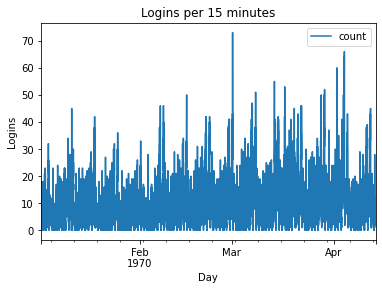

In [14]:
#plotting number of logins per 15min period
rdf.plot(x = 'time', y = 'count')
plt.title("Logins per 15 minutes")
plt.xlabel("Day")
plt.ylabel("Logins")
plt.show()

Logins appear to be cyclical on a weekly basis based on above number of logins per 15 min period plot.

In [15]:
#resample original dataframe into 1 day increments instead of 15 min.
daydf = df.resample('1D', label='right').sum()
daydf['day_count'] = 1

In [16]:
#obtaining total number of days for each month in dataframe, this is being done because not every month has data from every day
mon_tot = list(daydf.resample('1M', label='right').sum()['day_count'])

In [17]:
#determining average number of daily logins by month.  
y = rdf.groupby('month')['count'].sum() / mon_tot
y

month
1     707.500000
2     881.035714
3    1087.967742
4     965.785714
Name: count, dtype: float64

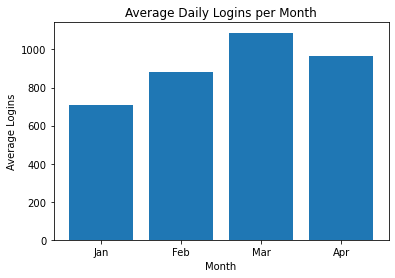

In [18]:
#graphing average number of daily logins by month
plt.bar(y.index, y)
plt.title("Average Daily Logins per Month")
plt.xlabel("Month")
plt.ylabel("Average Logins")
plt.xticks([1, 2, 3, 4], ['Jan', 'Feb', 'Mar', 'Apr'])
plt.show()

Logins appear to be increasing as months progress.  Average daily logins used due to April only having 14 days of data.

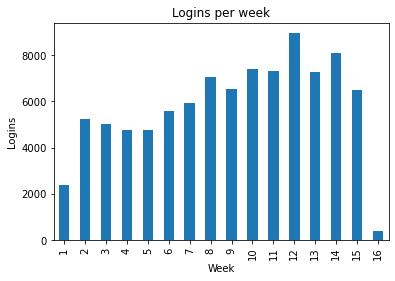

In [19]:
#Graphing sum of logins per week
rdf.groupby('week')['count'].sum().plot(kind='bar')
plt.title("Logins per week")
plt.xlabel("Week")
plt.ylabel("Logins")
plt.show()

Logins vary by week and appear to be increasing as week progress.  Note: Week 1 and 16 do not have a full week of data therefore should be excluded. 

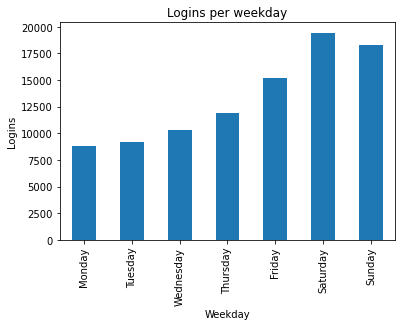

In [20]:
#Graphing logins by day of the week
import calendar
ax = rdf.groupby('weekday')['count'].sum().plot(kind='bar')
plt.title("Logins per weekday")
plt.xlabel("Weekday")
plt.ylabel("Logins")
ax.set_xticklabels([calendar.day_name[d] for d in range(7)])
plt.show()

Logins vary by week day.  Logins increase as the week progresses with Saturdays, followed by Sundays and Fridays having the most logins.  

In [21]:
#Resampling dataframe into 1 day increments
daydf = df.resample('1D', label='right').sum()
daydf['day_count'] = 1

In [22]:
#viewing number of days per month in dataframe
daydf.resample('1M', label='right').sum()

,count,day_count
login_time,,
1970-01-31,20434,30
1970-02-28,24083,28
1970-03-31,34348,31
1970-04-30,14277,14


The above shows that January is missing one day of data and April only has 14 days of data.  For this reason average number of daily logins should be used rather than sum of logins.

In [23]:
#calculating average number of logins by day of month.  Couldn't figure out how to calculate number of each day of month in data so did it manually as a list. 
d = rdf.groupby('day')['count'].sum() / [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1]

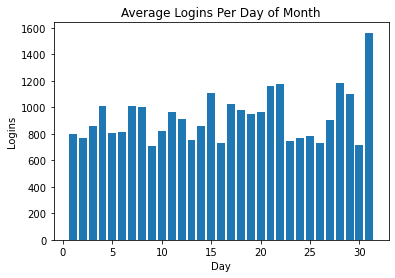

In [24]:
#Graphing average number of logins by day of month
plt.bar(d.index, d)
plt.title("Average Logins Per Day of Month")
plt.xlabel("Day")
plt.ylabel("Logins")
plt.show()

Average number of logins vary by day of the month but no real trend seen over month.  Average daily logins used due to April only having 14 days of data.  Spike in logins on 31st is likely due to only one of the months having 31 days in it.  

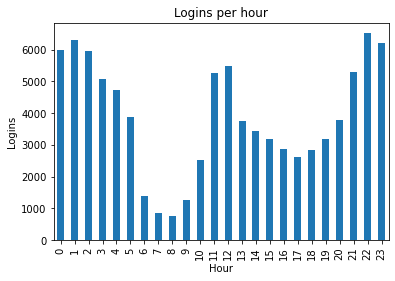

In [25]:
#Graphing logins by hour of the day
rdf.groupby('hour')['count'].sum().plot(kind='bar')
plt.title("Logins per hour")
plt.xlabel("Hour")
plt.ylabel("Logins")
plt.show()

Most logins are highest at night and over lunch hours.  Least logins are during morning hours.

## EDA Conclusion

1. Logins appear to be cyclical on a weekly basis
2. Logins peak on Fridays through Sundays with Saturday being the weekly peak
3. Logins increased from January through March
4. On a daily basis, logins are at the highest during non-buisness hours and over lunch hours.  The least number of logins take place during the morning buisness hours.
5. No pattern was found for logins by day of the month

# Part 2 - Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.


## Answer

### 1

As a key measure of success I would look for an increased number of routes that cross the toll bridge relative to total routes taken.  This metric would be: routes crossing toll bridge /  total number of routes.  The metric could be broken down to the individual driver, day, week, day of the week, or month.  It is assumed that the toll bridge is the primary route between the two cities and therefore an increased number of routes across the toll bridge relative to all routes would indicate an increase in driving partners serving both cities.

A second key measure of succes would be comparing average revenue per trip relative to the number of times a driver crosses the toll bridge.  I assume that thre real goal of wanting to increase routes that cross the bridge would be to increase revenue.  

### 2

#### A

A practical experiment that could be conducted would be to select drivers that meet a certain minimum criteria.  Minimum criteria could be things such as length of time as a driver, number of routes per week/month, total number of routes driven, city in which most routes have been driven and so on.  From these drivers, select a proportion of them (possibly 20%, depending on the overall size of this driver population) to be selected to carry out the toll bridge reimbersment cost test.  This selection of drivers would be chosen in a stratified way across the entire driver population.  Stratification would be determined by the metrics Ultimate managers determine are the most representative of their drivers, most likely the city in which the most number of routes have been driven would be an important metric to stratify between.  The experiment could be carried out for a period of time such as 6 months in order to collect sufficient data.  The select group of drivers data could be compared to data from their months prior and to the group of drivers not in the selection.  

#### B

A/B test, T-test or Z-test could both be used to compare the treatment group to the control.  

#### C

I would present to Ultimate manages the results on how number of routes across the toll bridge changed and how number of routes crossing the bridge affected revenue.  If the experiment demonstrated increased revenue as number of toll bridge crossings increased I would recommend expansion of the program.  

# Part 3 ‑ Predictive modeling

## Data Loading and Cleaning

In [3]:
#Loading and viewing data.  pd.read_json() would not work so used open and jason.load().
import json

file = open('ultimate_data_challenge.json', 'r')
df = pd.DataFrame(json.load(file))
file.close()

df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [4]:
#viewing data types and non-nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [5]:
df.shape

(50000, 12)

In [6]:
df.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

In [7]:
#filling null values for driver ratings with mean value for column.
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
#Drop rows with na's
df.dropna(axis=0, inplace=True)

396 samples were removed from the data due to lacking phone data.  This represents less than 1% of the total data.

In [8]:
#Converting date columns to datetime format
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [9]:
#viewing clean data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  bool          
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

## Exploritory Data Analysis

In [10]:
#number of accounts per city
df['city'].value_counts()

Winterfell        23125
Astapor           16413
King's Landing    10066
Name: city, dtype: int64

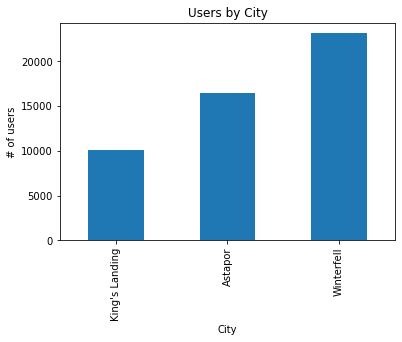

In [11]:
#graphing number of accounts by city
df.city.value_counts().sort_values().plot(kind = 'bar')
plt.xlabel('City')
plt.ylabel('# of users')
plt.title('Users by City')
plt.show()

Account numbers vary by city with Winterfell having the most and King's Landing the least.

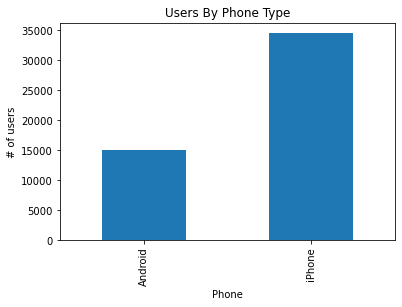

In [12]:
#Graphing accounts by phone type
df.phone.value_counts().sort_values().plot(kind = 'bar')
plt.xlabel('Phone')
plt.ylabel('# of users')
plt.title('Users By Phone Type')
plt.show()

IPhone users have more accounts.

In [13]:
#Difference between ultimate black users and not UBU
df['ultimate_black_user'].value_counts()

False    30992
True     18612
Name: ultimate_black_user, dtype: int64

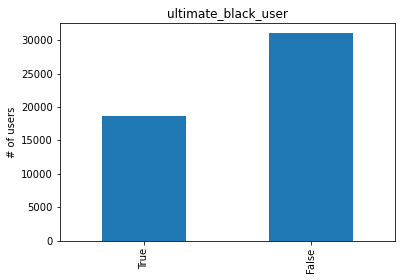

In [14]:
#Graphing UBU acounts vs non UBU
df.ultimate_black_user.value_counts().sort_values().plot(kind = 'bar')
plt.ylabel('# of users')
plt.title('ultimate_black_user')
plt.show()

More users are not UBU.

In [15]:
#Viewing first and last signup dates 
print('First and last signup dates')
print(min(df.signup_date))
print(max(df.signup_date))

First and last signup dates
2014-01-01 00:00:00
2014-01-31 00:00:00


In [16]:
print('Range of last trip dates')
print(min(df.last_trip_date))
print(max(df.last_trip_date))

Range of last trip dates
2014-01-01 00:00:00
2014-07-01 00:00:00


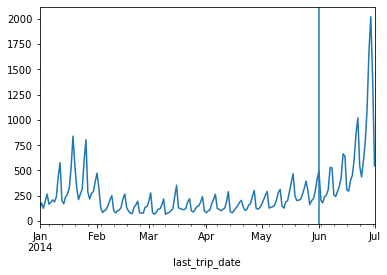

In [17]:
#Graphing last trip date
df.groupby('last_trip_date').size().plot()
plt.axvline(x='2014-06-01')
plt.show()

In [18]:
#Create retain column of users that have last trips in the last 30 days
df['retain'] = (df.last_trip_date >= '2014-06-01').astype(int)

In [19]:
print('Percent retained after 6 months')
print(sum(df.retain)/len(df) * 100)

Percent retained after 6 months
37.640109668575114


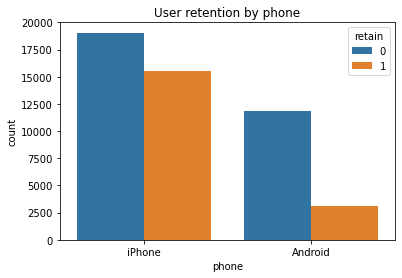

In [20]:
import seaborn as sns

#Graphing retained users by phone type
sns.countplot(x='phone', hue='retain', data=df)
plt.title('User retention by phone')
plt.show()

Android users are retained far less than iPhone users.  Is this a app issue with Android or some other sort of demographic?

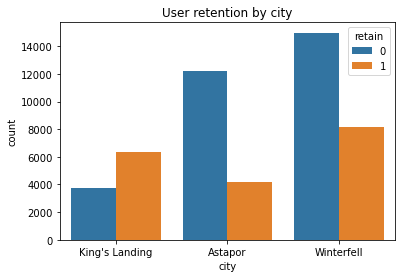

In [21]:
#Graphing retention by city
sns.countplot(x='city', hue='retain', data=df)
plt.title('User retention by city')
plt.show()

King's Landing has highest retention rate with Astapor City the lowest.

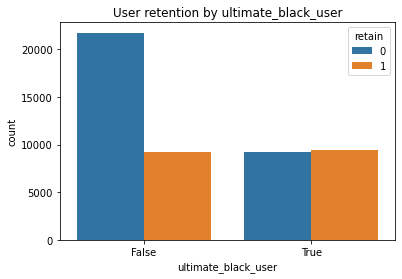

In [22]:
#Graphing UBU's retention
sns.countplot(x='ultimate_black_user', hue='retain', data=df)
plt.title('User retention by ultimate_black_user')
plt.show()

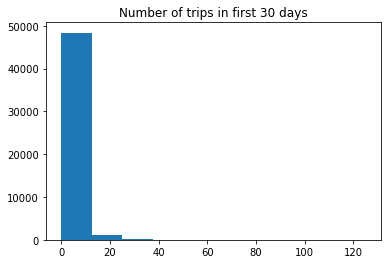

In [23]:
#Graph of number of trips in first 30 days
plt.hist(df.trips_in_first_30_days)
plt.title('Number of trips in first 30 days')
plt.show()

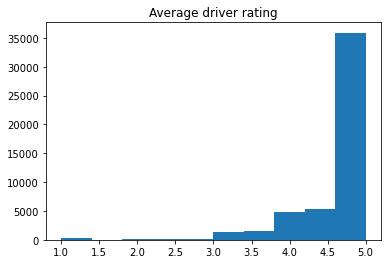

In [24]:
#Graph of average driver rating
plt.hist(df.avg_rating_of_driver)
plt.title('Average driver rating')
plt.show()

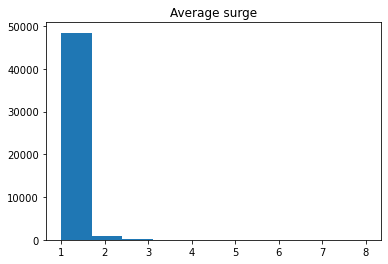

In [25]:
#Graph of ave surge
plt.hist(df.avg_surge)
plt.title('Average surge')
plt.show()

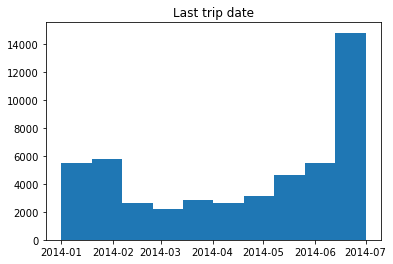

In [26]:
#Graph of last trip date
plt.hist(df.last_trip_date)
plt.title('Last trip date')
plt.show()

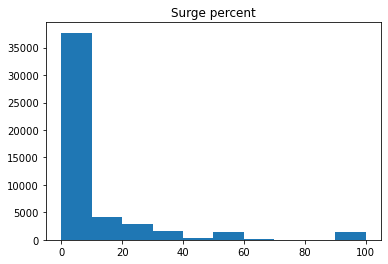

In [27]:
#Graph of surge percent
plt.hist(df.surge_pct)
plt.title('Surge percent')
plt.show()

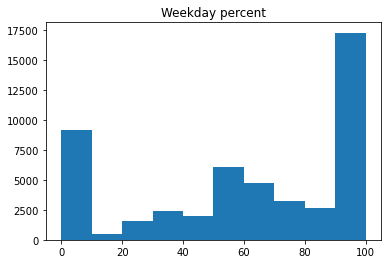

In [28]:
#Weekday percent graph
plt.hist(df.weekday_pct)
plt.title('Weekday percent')
plt.show()

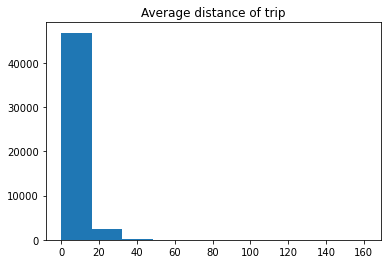

In [29]:
#Graph of average distance of ride
plt.hist(df.avg_dist)
plt.title('Average distance of trip')
plt.show()

In [30]:
#median value of average trip of users
np.median(df.avg_dist)

3.88

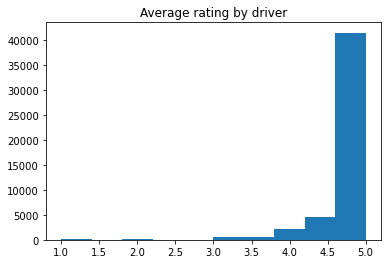

In [31]:
#Graph of average rating by driver
plt.hist(df.avg_rating_by_driver)
plt.title('Average rating by driver')
plt.show()

In [32]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retain
count,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000
mean,2.277256,4.601482,1.074991,8.875314,60.883832,5.785418,4.777862,0.376401
std,3.793300,0.565227,0.222666,19.989018,37.086239,5.669709,0.446220,0.484487
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,4.500000,1.000000,0.000000,33.300000,2.420000,4.700000,0.000000
50%,1.000000,4.700000,1.000000,0.000000,66.700000,3.880000,5.000000,0.000000
75%,3.000000,5.000000,1.050000,8.700000,100.000000,6.930000,5.000000,1.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000,1.000000


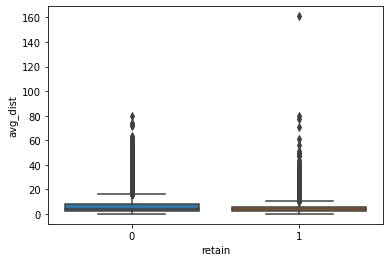

In [33]:
sns.boxplot(y='avg_dist', x='retain', data=df)

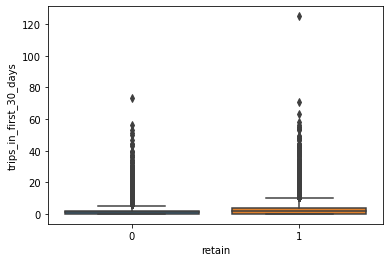

In [34]:
#Graph of trips in 1st 30 days by retention
sns.boxplot(y='trips_in_first_30_days', x='retain', data=df)
plt.show('Trips in 1st 30 days by retention')
plt.show()

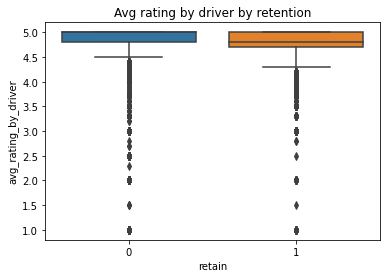

In [35]:
#Graphing retention based on driver rating
sns.boxplot(y='avg_rating_by_driver', x='retain', data=df)
plt.title('Avg rating by driver by retention')
plt.show()

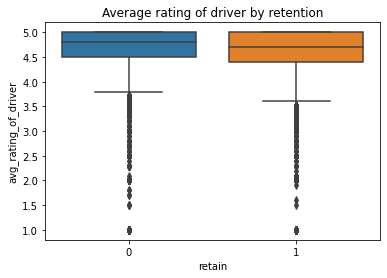

In [36]:
#Graphing avg rating of driver by retention
sns.boxplot(y='avg_rating_of_driver', x='retain', data=df)
plt.title('Average rating of driver by retention')
plt.show()

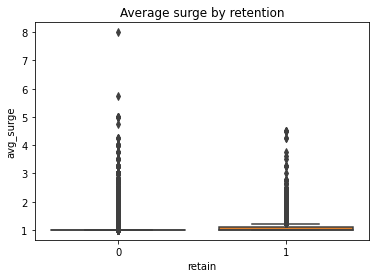

In [37]:
#Graphing average surge by retention
sns.boxplot(y='avg_surge', x='retain', data=df)
plt.title('Average surge by retention')
plt.show()

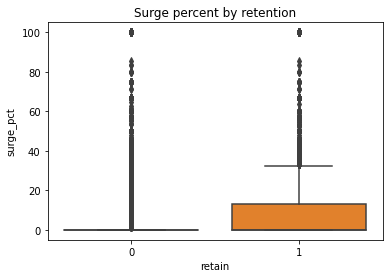

In [38]:
#graph of surge percentage by retention
sns.boxplot(y='surge_pct', x='retain', data=df)
plt.title('Surge percent by retention')
plt.show()

The above graphs by retention demonstrate non-normal distributions with a lot of outlayers.  It is not really obvious by the graphs if there are statistically significant differences between retention vs non-retention for the graphed features.

In [39]:
df.groupby('retain').mean()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
retain,,,,,,,,
0,1.657033,4.606132,1.075689,8.700091,0.297482,60.605952,6.190725,4.78699
1,3.304804,4.593778,1.073834,9.165615,0.503990,61.344208,5.113930,4.76274


In [40]:
df.groupby('retain').median()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
retain,,,,,,,,
0,1,4.8,1.0,0.0,False,69.2,4.03,5.0
1,2,4.7,1.0,0.0,True,64.3,3.73,4.8


## Modeling

### Loading and cleaning data for modeling

In [41]:
import json

file = open('ultimate_data_challenge.json', 'r')
df = pd.DataFrame(json.load(file))
file.close()

df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [42]:
#filling null values for driver ratings with mean value for column.
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)

#Drop rows with na's
df.dropna(axis=0, inplace=True)

#Converting date columns to datetime format
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

#Create retain column of users that have last trips in the last 30 days
df['retain'] = (df.last_trip_date >= '2014-06-01').astype(int) 

#Dropping last trip date column, this was converted into the dependant variable retain
df = df.drop(columns = 'last_trip_date')

df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retain
0,King's Landing,4,2014-01-25,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,0


In [43]:
#Get rid of date format and change to account age in days format
import datetime
d = datetime.datetime.strptime('2014-07-01', '%Y-%m-%d')
df['account_age'] = d - df['signup_date']
df['account_age']  = (df['account_age'] / np.timedelta64(1, 'D')).astype(int)

#Drop signup date being it is replaced by account age
df = df.drop(columns = ['signup_date'])

In [44]:
#Convert city and phone column categories to dummy variables
df = pd.get_dummies(df, columns = ['city', 'phone'])

#Convert boolean to int
df.ultimate_black_user = df.ultimate_black_user.astype(int)

df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retain,account_age,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,1,157,0,1,0,0,1
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,0,153,1,0,0,1,0
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,0,176,1,0,0,0,1
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,1,172,0,1,0,0,1
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,0,155,0,0,1,1,0


In [45]:
X = df.drop(columns = 'retain')
y = df.retain

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Logistic Regression

Logistic regression is chosen here for predictive modeling due to it being an industry standard for binary predictive models as well as its ability to pick out feature importance and log odd's ratios.

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

### Logistic Regression without scaling

In [48]:
#Create logistic regression classifier
lrc = LogisticRegression(max_iter=200, random_state = 42)

#Hyperparameter grid
log_params = {'penalty': ['l1', 'l2', 'none'], 
              'C' : [0.001, 0.1, 1, 10, 100]}

In [49]:
logReg_cv = GridSearchCV(lrc, log_params, n_jobs=5, cv=5)
logReg_cv.fit(X_train, y_train)

print(accuracy_score(logReg_cv.predict(X_test), y_test))

0.7162492364080635


C:\Users\matta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
#Best accuracy score and hyperparameters for model
print("Best Score:" + str(logReg_cv.best_score_))
print("Best Parameters: " + str(logReg_cv.best_params_))

Best Score:0.7191129284292666
Best Parameters: {'C': 0.1, 'penalty': 'l2'}


In [51]:
#Accuracy scores for training and test data
print(logReg_cv.score(X_train, y_train))
print(logReg_cv.score(X_test, y_test))

0.7196846602876572
0.7162492364080635


In [53]:
from sklearn.metrics import confusion_matrix

#Confusion matrix and classification report
logReg_pred = logReg_cv.predict(X_test)
print(confusion_matrix(y_test, logReg_pred))
print(classification_report(y_test, logReg_pred))

[[8686 1542]
 [3103 3039]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79     10228
           1       0.66      0.49      0.57      6142

    accuracy                           0.72     16370
   macro avg       0.70      0.67      0.68     16370
weighted avg       0.71      0.72      0.71     16370



In [54]:
#ROC Score
fpr, tpr, thresholds = roc_curve(y_train, logReg_cv.predict_proba(X_train)[:, 1])
auc = roc_auc_score(y_test, logReg_cv.predict_proba(X_test)[:, 1])
print("AUC:", format(auc))

AUC: 0.7592109604692592


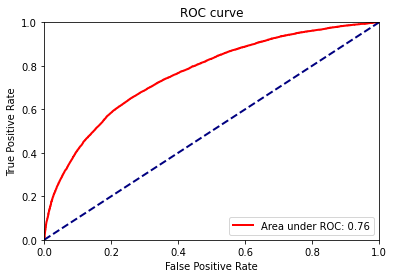

In [55]:
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='Area under ROC: {:.2f}'.format(auc))
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('ROC curve')
plt.show()

I would consider this a weak to average model.

### Logistic Regression with scaling and multicollinear features removed

In [56]:
#Features to be scaled, these are all non-binary features, binary features will remain as they are unscaled.
features = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'account_age']

#Scaling data, using standard scaler.
scaler = StandardScaler()
scaler.fit(X_train[features]) # use train data to fit
X_train_scaled = scaler.transform(X_train[features])
X_test_scaled = scaler.transform(X_test[features])

#### Calculating multicollinearity

In [57]:
#Rename King's Landing coulumn to eliminate '
df = df.rename(columns={"city_King's Landing" : "city_King_Landing"})
df.columns

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'retain', 'account_age', 'city_Astapor',
       'city_King_Landing', 'city_Winterfell', 'phone_Android',
       'phone_iPhone'],
      dtype='object')

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

#Calculating VIF for data, after running several times phone_Android and city_King_Landing features were eliminated
yy, XX = dmatrices("retain ~ trips_in_first_30_days+avg_rating_of_driver+avg_surge+surge_pct+ultimate_black_user+weekday_pct+avg_dist+avg_rating_by_driver+account_age+phone_iPhone+city_Astapor+city_Winterfell", data = df, return_type='dataframe')

In [59]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(XX.values, i) for i in range(XX.shape[1])]
vif['variable'] = XX.columns

In [60]:
#View VIF, all values under 10 after two features removed
vif

,VIF,variable
0,594.742239,Intercept
1,1.046542,trips_in_first_30_days
2,1.021535,avg_rating_of_driver
3,2.710591,avg_surge
4,2.767782,surge_pct
5,1.035939,ultimate_black_user
6,1.035860,weekday_pct
7,1.051717,avg_dist
8,1.028256,avg_rating_by_driver
9,1.002577,account_age


In [62]:
 #Features to be scaled, these are all non-binary features, binary features will remain as they are unscaled.
features = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'account_age']

#Dropping 'city_King_Landing' and 'phone_Android' from dataframe
df_lg = df.drop(columns = ['city_King_Landing', 'phone_Android', 'retain'])
df_lg_y = df.retain

#Train test split of dataframe with dropped data
X_train_drop, X_test_drop, y_train, y_test = train_test_split(df_lg, df_lg_y, test_size=0.33, random_state=42)

#Scaling data, using robust scaler due to large number of outlyers. 
scaler = StandardScaler()
scaler.fit(X_train[features]) # use train data to fit
X_train_scaled = scaler.transform(X_train_drop[features])
X_test_scaled = scaler.transform(X_test_drop[features])

In [63]:
#Create logistic regression classifier
lrc = LogisticRegression(max_iter=200, random_state = 42)

#Hyperparameter grid
log_params = {'penalty': ['l1', 'l2', 'none'], 
              'C' : [0.001, 0.1, 1, 10, 100]}

In [64]:
logReg_cv = GridSearchCV(lrc, log_params, n_jobs=5, cv=5)
logReg_cv.fit(X_train_scaled, y_train)

print(accuracy_score(logReg_cv.predict(X_test_scaled), y_test))

0.6551618814905315


In [65]:
#Best accuracy score and hyperparameters for model
print("Best Score:" + str(logReg_cv.best_score_))
print("Best Parameters: " + str(logReg_cv.best_params_))

Best Score:0.6605283479734974
Best Parameters: {'C': 0.1, 'penalty': 'l2'}


In [66]:
#Accuracy scores for training and test data
print(logReg_cv.score(X_train_scaled, y_train))
print(logReg_cv.score(X_test_scaled, y_test))

0.660046939880845
0.6551618814905315


In [67]:
#Confusion matrix and classification report
logReg_pred = logReg_cv.predict(X_test_scaled)
print(confusion_matrix(y_test, logReg_pred))
print(classification_report(y_test, logReg_pred))

[[9672  556]
 [5089 1053]]
              precision    recall  f1-score   support

           0       0.66      0.95      0.77     10228
           1       0.65      0.17      0.27      6142

    accuracy                           0.66     16370
   macro avg       0.65      0.56      0.52     16370
weighted avg       0.65      0.66      0.59     16370



In [68]:
#ROC Score
fpr, tpr, thresholds = roc_curve(y_train, logReg_cv.predict_proba(X_train_scaled)[:, 1])
auc = roc_auc_score(y_test, logReg_cv.predict_proba(X_test_scaled)[:, 1])
print("AUC:", format(auc))

AUC: 0.6195071484449568


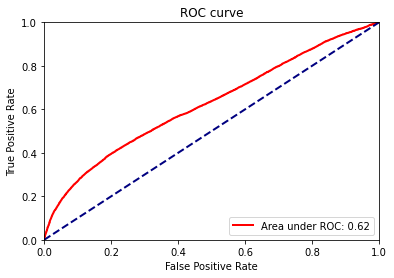

In [69]:
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='Area under ROC: {:.2f}'.format(auc))
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('ROC curve')
plt.show()

This is a fairly weak model.

#### Logistic Regression Feature Importance

Feature: 0, Score: 0.11996
Feature: 1, Score: -0.06966
Feature: 2, Score: -0.31468
Feature: 3, Score: 0.00496
Feature: 4, Score: 0.87337
Feature: 5, Score: -0.00021
Feature: 6, Score: -0.03606
Feature: 7, Score: -0.17375
Feature: 8, Score: 0.00418
Feature: 9, Score: -0.79163
Feature: 10, Score: 0.92621
Feature: 11, Score: -0.28710
Feature: 12, Score: -0.61821
Feature: 13, Score: 0.46569


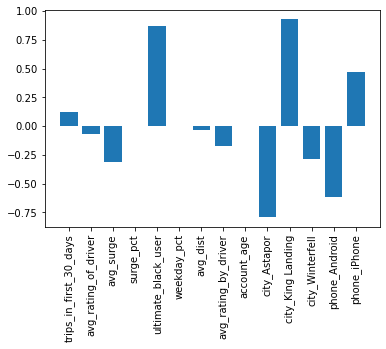

In [86]:
#https://machinelearningmastery.com/calculate-feature-importance-with-python/
#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

features1 = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'account_age', 'city_Astapor',
       'city_King Landing', 'city_Winterfell', 'phone_Android', 'phone_iPhone']
# define the model
model = LogisticRegression(max_iter = 400)
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(range(0, 14), features1, rotation=90)
plt.show()

Ultimate Black User, King's Landing, and IPhone have positively correlated to retention.

Android, Astapor, Winterfell, and average surge are negatively correlated to retention.

In [83]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[features])

Feature: 0, Score: 0.50503
Feature: 1, Score: -0.01048
Feature: 2, Score: -0.07295
Feature: 3, Score: 0.06666
Feature: 4, Score: 0.01402
Feature: 5, Score: -0.14256
Feature: 6, Score: -0.02688
Feature: 7, Score: 0.04979


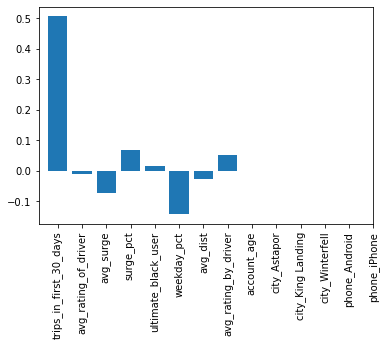

In [87]:
#https://machinelearningmastery.com/calculate-feature-importance-with-python/
#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

features1 = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'account_age', 'city_Astapor',
       'city_King Landing', 'city_Winterfell', 'phone_Android', 'phone_iPhone']
# define the model
model = LogisticRegression(max_iter = 400)
# fit the model
model.fit(X_scaled, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(range(0, 14), features1, rotation=90)
plt.show()

With Scaled, non-binary data, number of trips in the first 30 days is positively correlated to retention.  Weekday percent is negatively correlated to retention.

#### Log Odds

In [90]:
from patsy import dmatrices
import statsmodels.api as sm

yy, XX = dmatrices("retain ~ trips_in_first_30_days+avg_rating_of_driver+avg_surge+surge_pct+ultimate_black_user+weekday_pct+avg_dist+avg_rating_by_driver+account_age+phone_iPhone+city_Astapor+city_Winterfell", data = df, return_type='dataframe')

mod = sm.Logit(yy, XX)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.556871
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 retain   No. Observations:                49604
Model:                          Logit   Df Residuals:                    49591
Method:                           MLE   Df Model:                           12
Date:                Sun, 18 Jul 2021   Pseudo R-squ.:                  0.1592
Time:                        12:19:42   Log-Likelihood:                -27623.
converged:                       True   LL-Null:                       -32851.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.4202      0.252     -1.670      0.095      -0.913      

In [91]:
pd.DataFrame(round(np.exp(res.params) - 1, 3))

,0
Intercept,-0.343
trips_in_first_30_days,0.128
avg_rating_of_driver,-0.056
avg_surge,-0.190
surge_pct,0.004
ultimate_black_user,1.397
weekday_pct,-0.000
avg_dist,-0.035
avg_rating_by_driver,-0.146
account_age,0.006


Trips in 1st 30 days, IPhone, Ultimate Black User have positive log odds.  Astapor and Winterfell along with average surge have negative log odds.  

### Random Forest

Random Forest models are very common and frequently produce strong models.  Feature importance can also be produced through this model.

In [155]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
#Creat random forest classifier
rfc = RandomForestClassifier(random_state = 42)

#Hyperparameter grid
param_grid = {'n_estimators': [100, 150, 200, 250, 400],
             'max_features': ['auto', 'sqrt'],
             'max_depth' : [8, 9, 10, 11]}

In [162]:
#GridSearchCV for random forest
rfc_cv = GridSearchCV(rfc, param_grid, cv=5)
#build model    
rfc_cv.fit(X_train, y_train)
#predict using model
y_pred = rfc_cv.predict(X_test)

In [175]:
y_pred = rfc_cv.predict(X_test)

In [176]:
#Best score and parameters determined from gridsearch cv
print('Best score:', rfc_cv.best_score_)
print('Best parameters:', rfc_cv.best_params_)

Best score: 0.7823012297955164
Best parameters: {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200}


In [177]:
print('Training accuracy: ', rfc_cv.score(X_train, y_train))
print('Test set accuracy: ', rfc_cv.score(X_test, y_test))

Training accuracy:  0.815279533008365
Test set accuracy:  0.7847892486255346


In [178]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83     10228
           1       0.74      0.65      0.70      6142

    accuracy                           0.78     16370
   macro avg       0.77      0.76      0.76     16370
weighted avg       0.78      0.78      0.78     16370



In [179]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test, y_pred), index=range(0,2), columns=range(0,2))

,0,1
0,8831,1397
1,2126,4016


In [186]:
y_pred_proba = rfc_cv.predict_proba(X_test)[:,1]

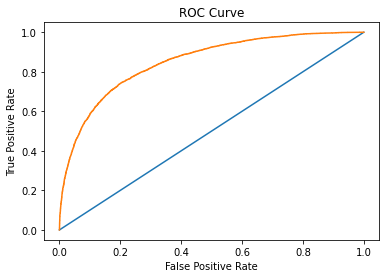

In [187]:

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresh = roc_curve(y_test, y_pred_proba)

#plot ROC curve
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [188]:
roc_auc_score(y_test, y_pred_proba)

0.8494676392895197

This is by far the strongest model used so far and should be utilized to predict user retention.

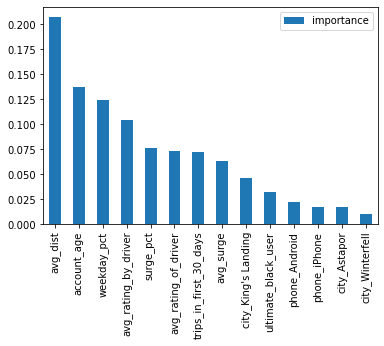

In [191]:
rf = RandomForestClassifier() 
## Fit the model on your training data.
rf.fit(X_train, y_train) 
## And score it on your testing data.
rf.score(X_test, y_test)
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.plot(kind='bar')
plt.show()

Average distance, account age, weekday percent, average rating by drive all have highest importance

### Conclusion

1. The Random Forest Model should be used for predictive modeling of user retention with a 0.849 AUC

2. Trips in 1st 30 days, average distance, IPhone, Ultimate Black Users, King's Landing, and average rating by driver all are positive indicators of retention.  Users with these statistics have a much higher chance of being retained.

3. Astapor, Winterfell, average surge, and Android users are all negative indicators of retention.  It would be suggested that users with these indicators are given incentives to increase their retention. 

4. The Android app experience should be examined to determine if it has anything to do with lack of retention.

5. To increase retention incentives could focus on increaseing Ultimate Black Users, the number of trips in 1st 30 days, possibly basic instructions on how to be a good passanger, and increasing the average distance traveled.